In [1]:
import  pandas as pd


In [2]:
iris_df = pd.read_csv('iris.data', sep=',')
iris_df

,sepal_length,sepal_with,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree


In [4]:
iris_df = iris_df.dropna()
iris_df

,sepal_length,sepal_with,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_df[['name']].value_counts()

name           
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
plant_names = iris_df.name.unique()
plant_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
iris_df.name = iris_df.name.apply(lambda x: list(plant_names).index(x))
iris_df

,sepal_length,sepal_with,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
x = iris_df[['sepal_length', 'sepal_with', 'petal_length', 'petal_width']].values
y = iris_df[['name']].values


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [15]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3, random_state=1)
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=1)

In [16]:
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)


0.9555555555555556

In [17]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



[Text(0.375, 0.875, 'X[2] <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.65\nentropy = 0.993\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(0.25, 0.375, 'X[2] <= 5.0\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\nentropy = 0.211\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

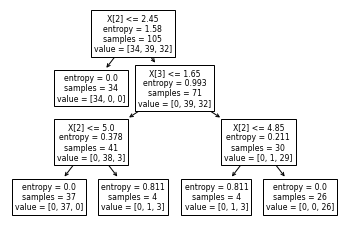

In [13]:
tree.plot_tree(model)
